# TCS iON INTERNSHIP

## HR Salary Dashboard - Train the Dataset and Predict Salary

The objective is to predict the salary of HR when they switch jobs. HR Salary Prediction is an upcoming trend in Human Resources. Recruitment tools predict high performers, and increasingly companies are able to predict which employee deserve what compensation based on their age and years of experience. In this model, we will explain what HR predictive analytics are and how they can be a real game-changer for HR departments.

### Importing Libraries 

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [87]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\hr_salary_prediction\hr.csv')
df

,name,age,years_of_experience,current_salary
0,Jacob,21,1,12500
1,Michael,22,2,15700
2,Matthew,22,1,10000
3,Joshua,21,1,10022
4,Christopher,23,2,15000
...,...,...,...,...
311,Theodore,29,8,25000
312,Grayson,24,2,15000
313,Lorenzo,29,8,36700
314,Joe,23,1,12500


### Data Exploration

In [88]:
df.head()

,name,age,years_of_experience,current_salary
0,Jacob,21,1,12500
1,Michael,22,2,15700
2,Matthew,22,1,10000
3,Joshua,21,1,10022
4,Christopher,23,2,15000


In [89]:
df.tail()

,name,age,years_of_experience,current_salary
311,Theodore,29,8,25000
312,Grayson,24,2,15000
313,Lorenzo,29,8,36700
314,Joe,23,1,12500
315,Ben,41,15,32000


In [90]:
df.shape

(316, 4)

There are 315 rows and 5 columns in the HR dataset

In [91]:
# Checking for null values
df.isnull().sum()

name                   0
age                    0
years_of_experience    0
current_salary         0
dtype: int64

In [92]:
df.describe()

,age,years_of_experience,current_salary
count,316.000000,316.000000,316.000000
mean,30.465190,6.952532,25263.848101
std,7.140454,6.042781,12327.650797
min,21.000000,1.000000,6500.000000
25%,24.750000,3.000000,15850.000000
50%,29.000000,5.000000,24000.000000
75%,35.000000,9.000000,30700.000000
max,50.000000,29.000000,90000.000000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 316 non-null    object
 1   age                  316 non-null    int64 
 2   years_of_experience  316 non-null    int64 
 3   current_salary       316 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 10.0+ KB


In [94]:
df.dtypes

name                   object
age                     int64
years_of_experience     int64
current_salary          int64
dtype: object

In [95]:
df.columns

Index(['name', 'age', 'years_of_experience', 'current_salary'], dtype='object')

### Data Visualization / EDA

C:\Users\DELL\AppData\Local\Temp\ipykernel_11252\695122566.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


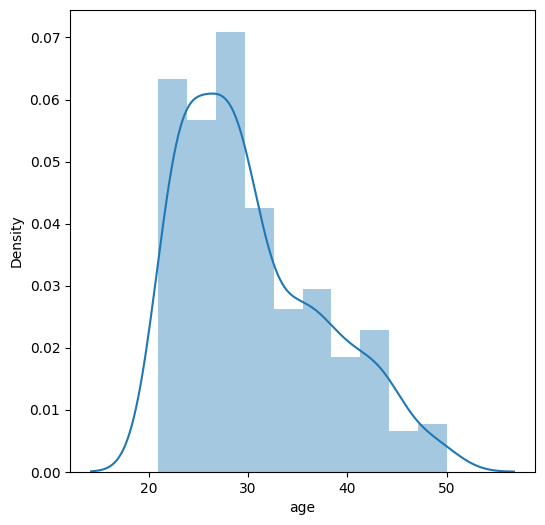

In [96]:
plt.figure(figsize = (6,6))
sns.distplot(df['age'])
plt.show()

<AxesSubplot: xlabel='years_of_experience', ylabel='count'>

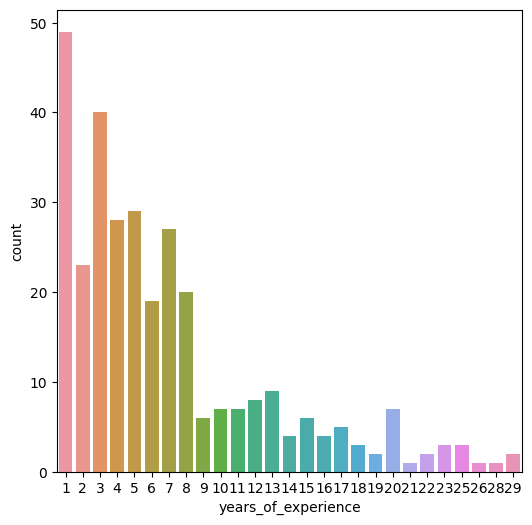

In [97]:
plt.figure(figsize = (6,6))
sns.countplot(x='years_of_experience' ,data=df)

plt.figure(figsize = (6,6))
sns.countplot(x='gender' ,data=df)

<AxesSubplot: >

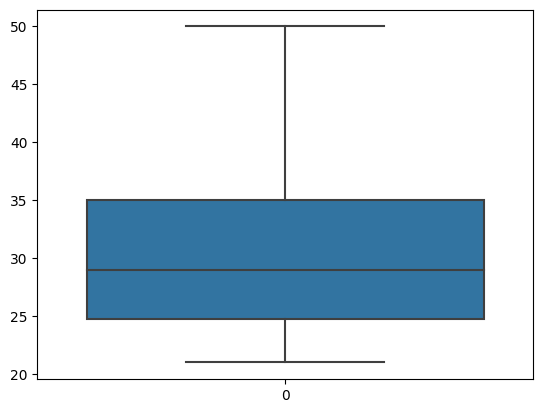

In [98]:
sns.boxplot( df['age'] )

<AxesSubplot: xlabel='years_of_experience', ylabel='age'>

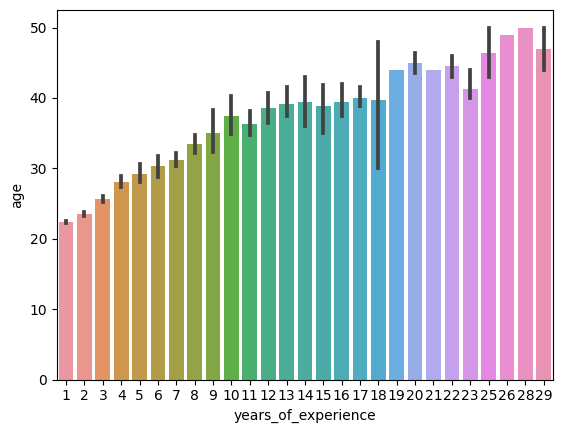

In [99]:
sns.barplot(x ="years_of_experience", y ="age", data = df)

sns.barplot(x ="gender", y ="current_salary", data = df)

<AxesSubplot: xlabel='age', ylabel='current_salary'>

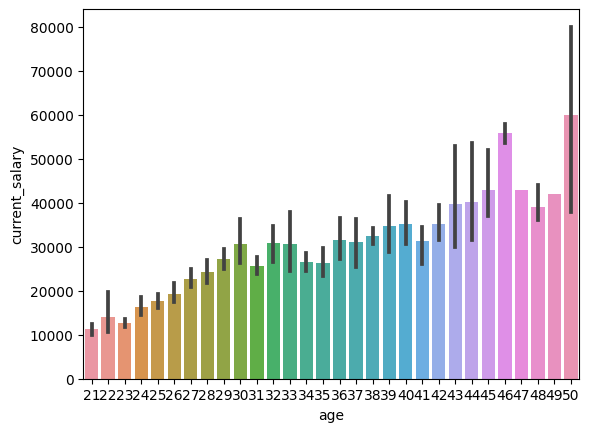

In [100]:
sns.barplot(x ="age", y ="current_salary", data = df)

<AxesSubplot: xlabel='years_of_experience', ylabel='current_salary'>

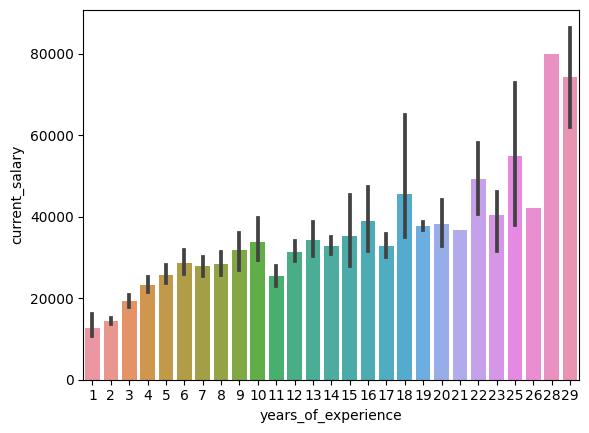

In [101]:
sns.barplot(x ="years_of_experience", y ="current_salary", data = df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11252\4080866019.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


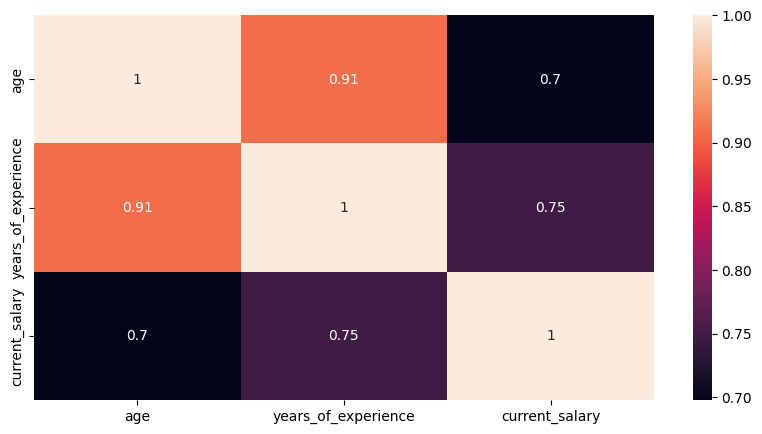

In [102]:
plt.figure(figsize=(10,5))
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

### Preprocessing Task before Model Building

#### Selecting features based on general requirements

While analyzing the dataset, it is clear name have no significance in salary prediction. so we can drop it.

In [103]:
df.drop(['name'],axis=1,inplace=True)

In [104]:
df.head()

,age,years_of_experience,current_salary
0,21,1,12500
1,22,2,15700
2,22,1,10000
3,21,1,10022
4,23,2,15000


### Splitting features and target

In [107]:
features=['age','years_of_experience']
X = pd.DataFrame(df,columns=features)
y = pd.DataFrame(df,columns=['current_salary'])

In [108]:
print(X)

     age  years_of_experience
0     21                    1
1     22                    2
2     22                    1
3     21                    1
4     23                    2
..   ...                  ...
311   29                    8
312   24                    2
313   29                    8
314   23                    1
315   41                   15

[316 rows x 2 columns]


In [109]:
print(y)

     current_salary
0             12500
1             15700
2             10000
3             10022
4             15000
..              ...
311           25000
312           15000
313           36700
314           12500
315           32000

[316 rows x 1 columns]


### Splitting our data into training and testing

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=2)

In [112]:
X_train

,age,years_of_experience
134,23,1
166,26,3
2,22,1
141,38,13
77,25,3
...,...,...
299,33,8
22,31,6
72,28,3
15,28,6


In [113]:
y_train

,current_salary
134,12000
166,15000
2,10000
141,32500
77,16000
...,...
299,21000
22,30000
72,25000
15,30000


In [114]:
X_test

,age,years_of_experience
250,22,1
188,29,5
7,24,3
189,24,2
203,23,1
...,...,...
140,29,7
127,48,13
179,26,3
183,35,6


In [115]:
y_test

,current_salary
250,11000
188,22000
7,21000
189,15000
203,9000
...,...
140,25800
127,44000
179,15000
183,22000


### Standardization

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
sc = StandardScaler()

In [118]:
X_train_std = sc.fit_transform(X_train)

In [119]:
X_train_std

array([[-1.08438253, -1.01434046],
       [-0.66267821, -0.68237449],
       [-1.22495064, -1.01434046],
       [ 1.02413906,  0.97745535],
       [-0.80324632, -0.68237449],
       [-1.22495064, -1.01434046],
       [-0.381542  , -0.18442554],
       [ 1.30527527,  2.63728519],
       [ 0.18073042,  0.31352341],
       [-1.22495064, -1.01434046],
       [ 0.74300285,  0.14754043],
       [ 1.16470716,  0.97745535],
       [ 1.30527527,  2.63728519],
       [-0.80324632, -0.68237449],
       [ 1.30527527, -0.01844255],
       [-0.2409739 , -0.01844255],
       [-1.22495064, -0.18442554],
       [-1.08438253, -0.84835748],
       [-1.08438253, -0.84835748],
       [-1.22495064, -1.01434046],
       [-0.52211011, -0.51639151],
       [ 0.88357095,  0.64548938],
       [ 0.46186663,  0.64548938],
       [-0.80324632, -0.68237449],
       [ 0.18073042,  0.14754043],
       [-0.381542  , -0.68237449],
       [ 0.32129853,  0.4795064 ],
       [-0.2409739 ,  0.14754043],
       [-0.2409739 ,

In [120]:
X_test_std = sc.transform(X_test)

In [121]:
X_test_std

array([[-1.22495064, -1.01434046],
       [-0.2409739 , -0.35040852],
       [-0.94381443, -0.68237449],
       [-0.94381443, -0.84835748],
       [-1.08438253, -1.01434046],
       [-1.22495064, -1.01434046],
       [-0.2409739 , -0.35040852],
       [-0.381542  , -0.51639151],
       [-0.381542  , -0.51639151],
       [-0.10040579, -0.18442554],
       [-0.2409739 , -0.35040852],
       [ 1.02413906, -0.18442554],
       [-0.10040579,  0.14754043],
       [-0.94381443, -0.35040852],
       [ 1.58641148,  2.13933624],
       [-0.52211011, -0.35040852],
       [-0.94381443, -0.84835748],
       [ 0.60243474,  0.14754043],
       [-1.22495064, -0.84835748],
       [-0.381542  , -0.35040852],
       [-1.36551874, -1.01434046],
       [ 0.18073042, -0.01844255],
       [-1.08438253, -1.01434046],
       [-0.80324632, -0.68237449],
       [-1.22495064, -1.01434046],
       [ 0.60243474, -0.01844255],
       [-0.381542  , -0.51639151],
       [-0.52211011, -0.51639151],
       [ 2.57038822,

In [122]:
import joblib

In [123]:
joblib.dump(sc,r'C:\Users\DELL\Downloads\hr_salary_prediction\model\sc.sav')

['C:\\Users\\DELL\\Downloads\\hr_salary_prediction\\model\\sc.sav']

### Model Building

#### Linear Regression Model

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
lr = LinearRegression()

In [126]:
lr.fit(X_train_std, y_train)

LinearRegression()

In [127]:
y_pred_lr = lr.predict(X_test_std)

In [128]:
y_pred_lr

array([[15891.77922345],
       [22364.70783732],
       [18942.56252642],
       [17540.95821091],
       [16015.56655942],
       [15891.77922345],
       [22364.70783732],
       [20839.31618584],
       [20839.31618584],
       [23890.09948881],
       [22364.70783732],
       [24880.39817661],
       [26693.30811984],
       [21745.77115745],
       [44998.0079377 ],
       [22117.13316537],
       [17540.95821091],
       [27312.24479971],
       [17293.38353896],
       [22240.92050135],
       [15767.99188747],
       [25539.27847628],
       [16015.56655942],
       [19066.3498624 ],
       [15891.77922345],
       [25910.6404842 ],
       [20839.31618584],
       [20715.52884986],
       [54274.14518261],
       [23642.52481686],
       [22488.4951733 ],
       [15891.77922345],
       [20591.74151389],
       [16015.56655942],
       [27064.67012776],
       [19190.13719837],
       [39020.22866772],
       [19190.13719837],
       [39020.22866772],
       [16015.56655942],


In [129]:
# calculating the coefficients
print(lr.coef_)

[[ 880.62178166 8444.26506638]]


In [130]:
# calculating the intercept
print(lr.intercept_)

[25535.85714286]


#### Checking for accuracy with linear regression

In [131]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [132]:
print("R2 score:",r2_score(y_test,y_pred_lr))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred_lr))
print("Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred_lr)))

R2 score: 0.5824511394241831
Mean Absolute Error: 5651.37541223414
Mean Squared Error: 7698.154149475987


Since the accuracy's too low, we are moving to check the accuracy with RandomForestRegressor 

### Random Forest Regression Model

In [139]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000)

In [140]:
rf.fit(X_train_std, y_train)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11252\1676408278.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_std, y_train)


RandomForestRegressor(n_estimators=1000)

In [141]:
y_pred_rf = rf.predict(X_test_std)

#### Checking the accuracy with RandomForestRegressor

In [142]:
print("R2 score:",r2_score(y_test,y_pred_rf))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred_rf))
print("Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

R2 score: 0.6089653680807168
Mean Absolute Error: 5395.770166007689
Mean Squared Error: 7449.730515094867


In [143]:
print("Salary predicted with Linear Regression:",lr.predict([[23,1]])) 
print("Salary predicted with Random Forest Regressor:",rf.predict([[23,1]])) 

Salary predicted with Linear Regression: [[54234.4231874]]
Salary predicted with Random Forest Regressor: [33385.9]


We can see that Random Forest Regression algorithm is better in accuracy and performance compared to Linear Regression Algorithm

## Saving the models

In [144]:
joblib.dump(lr,r'C:\Users\DELL\Downloads\hr_salary_prediction\model\linear_regression_model.sav')

['C:\\Users\\DELL\\Downloads\\hr_salary_prediction\\model\\linear_regression_model.sav']

In [145]:
joblib.dump(rf,r'C:\Users\DELL\Downloads\hr_salary_prediction\model\random_forest_regressor_model.sav')

['C:\\Users\\DELL\\Downloads\\hr_salary_prediction\\model\\random_forest_regressor_model.sav']

Saving the linear regression model and random regression model into a separate folder to deploy the trained models into web application